# 3.3.1 Assignment 5 Problem (30 points): Interacting random walkers

**Problem:** Write a Python code to explicitly follow the evolution of two interacting random walkers on a line (1D lattice), i.e. by direct simulation, not by using the transfer matrix approach. Have both walkers start at the same point, the midpoint of the lattice. Consider $\lambda=0$, $\frac{1}{3}$, $\frac{2}{3}$, and $1$. Repeat many times to obtain a distribution function. 

Comment on the results and compare (statistically) with the those for non-interacting walkers. 

Repeat the calculations for initial conditions where the two walkers start off adjacent to one another, and compare.

In [0]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt

"""
This function computes the next position of two random,
possibly interacting walkers.
Params:
  walker1: The position of the first walker
  walker2: The position of the second walker
  gridSize: The size of the 1d world they're in.
    Repeating boundary conditions are assumed.
  repulStr: The repulsion coefficient.
  
Returns:
  walk1Res: The new position of the first walker.
  walk2Res: The new position of the second walker.
"""
def genNextPos(walker1, walker2, gridSize, repulStr):
  walker2Larger = (walker2 > walker1)
  
  walk1Res, walk2Res = walker1, walker2
  
  pc = (repulStr/4)
  #print(pc)

  #print((abs(walker1 - walker2) % gridSize))
  randVal = rand.random()
  if ((abs(walker1 - walker2) % gridSize) == 0): 
    #print("Q")
    q = ((1/2)-(repulStr/4))
    #print(q)
    qrange = [pc, 2*pc, q + 2*pc, 2*q + 2*pc]
    #print("qrange: {}".format((qrange)))
    
    if randVal <= qrange[0]:
      walk1Res = (walker1 +1) % gridSize
      walk2Res = (walker2 +1) % gridSize
    elif randVal <= qrange[1]:
      walk1Res = (walker1 -1) % gridSize
      walk2Res = (walker2 -1) % gridSize
    elif randVal <= qrange[2]:
      walk1Res = (walker1 -1) % gridSize
      walk2Res = (walker2 +1) % gridSize
    else:
      walk1Res = (walker1 +1) % gridSize
      walk2Res = (walker2 -1) % gridSize
    
  elif (((abs(walker1 - walker2) % gridSize) == 2) | ((abs(walker1 - walker2) % gridSize) == 1)): 
    #print("P")
    p = (1/3)*(1-(repulStr/4))
    #print(p)
    prange = [p, 2*p, 3*p, 3*p + pc]
    #print("prange: {}".format((prange)))
    
    if randVal <= prange[0]:
      walk1Res = (walker1 +1) % gridSize
      walk2Res = (walker2 +1) % gridSize
    elif randVal <= prange[1]:
      walk1Res = (walker1 -1) % gridSize
      walk2Res = (walker2 -1) % gridSize
    elif randVal <= prange[2]:
      if walker2Larger:
        walk1Res = (walker1 -1) % gridSize
        walk2Res = (walker2 +1) % gridSize
      else:
        walk1Res = (walker1 +1) % gridSize
        walk2Res = (walker2 -1) % gridSize
    else:
      if walker2Larger:
        walk1Res = (walker1 +1) % gridSize
        walk2Res = (walker2 -1) % gridSize
      else:
        walk1Res = (walker1 -1) % gridSize
        walk2Res = (walker2 +1) % gridSize
      
  else:
    #print("Else")
    dirWalk1 = rand.random() >= 0.5
    dirWalk2 = rand.random() >= 0.5
    #print(dirWalk1, dirWalk2)
    walk1Res = ((walker1 + 1) % gridSize) if dirWalk1 else ((walker1 - 1) % gridSize)
    walk2Res = ((walker2 + 1) % gridSize) if dirWalk2 else ((walker2 - 1) % gridSize)
  #print(walk1Res, walk2Res)
  return walk1Res, walk2Res

"""
This function simulates a two-random walker random
walk for a given number of steps.
Params:
  walker1: The position of the first walker
  walker2: The position of the second walker
  gridSize: The size of the 1d world they're in.
    Repeating boundary conditions are assumed.
  numSteps: number of steps in the random walk.
  repulStr: The repulsion coefficient.
Returns: 
  walker1: The new position of the first walker.
  walker2: The new position of the second walker.
"""
def simWalk(gridSize, posWalk1, posWalk2, numSteps, repulStr):
    walker1 = posWalk1
    walker2 = posWalk2
    for index in range(numSteps):
      walker1, walker2 = genNextPos(walker1, walker2, gridSize, repulStr)
    return walker1, walker2

"""
This function simulates a multiple iterations of a 
two-random walker random walk for a given number of steps.
Params:
  numWalks: Number of walk iterations to simulate for.
  posWalk1: The position of the first walker
  posWalk2: The position of the second walker
  gridSize: The size of the 1d world they're in.
    Repeating boundary conditions are assumed.
  numSteps: number of steps in the random walk.
  repulStr: The repulsion coefficient.
Returns: 
  results [(resultW1, resultW2)], list of 
  resultsW1: The
  resultsW2: List of
"""
def mulSimWalk(numWalks, gridSize, posWalk1, posWalk2, numSteps, repulStr):
  results = []
  resultsW1 = []
  resultsW2 = []
  for index in range(numWalks):
    result = simWalk(gridSize, posWalk1, posWalk2, numSteps, repulStr)
    #print(result)
    results.append(result)
    resultsW1.append(result[0])
    resultsW2.append(result[1])
  return results, resultsW1, resultsW2

"""
This function turns a list of entries into a dictionary.
Params:
  aList: An input list of entries.
Returns:
  A dictionary representation of the list.
"""
def lstToDict(aList):
  dict = {}
  for entry in aList:
    dict[entry] = 1 if entry not in dict.keys() else (dict[entry] + 1)
  return dict
#np.lookfor("eigen")
"""
Given a list of tuples, it sorts the list based on
the value of the first entry in the tuple.
Param:
  lst: A list of tuples.
Returns:
  The list, sorted.
"""
def sortFst(lst):
  if lst == []: 
    return []
  fstEntry = lst.pop()
  return sortFst([x for x in lst if x[0] <= fstEntry[0]]) + [fstEntry] + sortFst([x for x in lst if x[0] > fstEntry[0]])    

"""
Given a dictionary, returns two lists, the keys
(sorted) and the entries (following the keys)
Params:
  aDict: A dictionary of integers and their requencies.
Returns:
  keys: The keys of that dictionary
  vals: The values of that list.
"""
def dictToLsts(aDict):
  keys = []
  vals = []
  entries = list(aDict.items())
  #print(entries)
  entries = sortFst(entries)
  for key, value in entries:
    keys.append(key)
    vals.append(value)
  return keys, vals

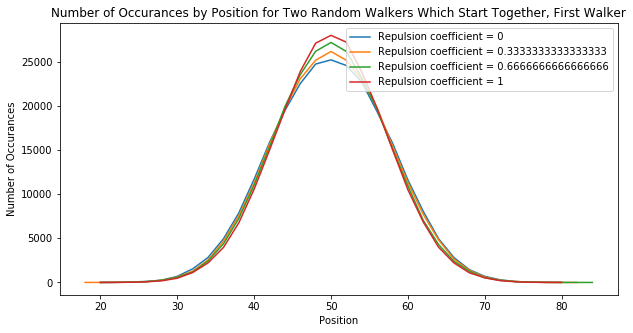

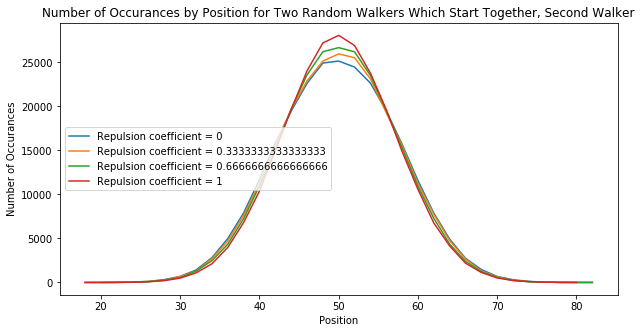

In [0]:
"""
Here are our parameters
"""
numIterations = 250000
gridSize = 100
startPoint1 = int((1/2)*gridSize)
startPoint2 = startPoint1
stepsPerIter = int((1/2)*gridSize)

repulStrs = [0, (1/3), (2/3), 1]

"""
This is the data we want to get.
"""
walkBoth = []
walk1st = []
walk2nd = []

walk1X = []
walk1Y = []

walk2X = []
walk2Y = []

"""
Here we calculate the data
"""
for entry in repulStrs:
  wAll, w1, w2 = mulSimWalk(numIterations, gridSize, startPoint1, startPoint2, stepsPerIter, entry)
  
  walkBoth.append(wAll)
  walk1st.append(w1)
  walk2nd.append(w2)
  
  w1Dict = lstToDict(w1)
  w2Dict = lstToDict(w2)
  w1K, w1V = dictToLsts(w1Dict)
  w2K, w2V = dictToLsts(w2Dict)
  
  walk1X.append(w1K)
  walk1Y.append(w1V)
  walk2X.append(w2K)
  walk2Y.append(w2V)

"""
Here we prepare the data for ease of comparison
"""
walk1XYs = zip(walk1X, walk1Y, repulStrs)
walk2XYs = zip(walk2X, walk2Y, repulStrs)

"""
Here we compare the data for the first and second walkers in a plot.
"""
plt.figure(figsize=(10,5))
plt.title("Number of Occurances by Position for Two Random Walkers Which Start Together, First Walker")
plt.xlabel("Position")
plt.ylabel("Number of Occurances")
for X, Y, repul in walk1XYs:
  plt.plot(X, Y, label = "Repulsion coefficient = {}".format(repul))
plt.legend()
  
plt.figure(figsize=(10,5))
plt.title("Number of Occurances by Position for Two Random Walkers Which Start Together, Second Walker")
plt.xlabel("Position")
plt.ylabel("Number of Occurances")
for X, Y, repul in walk2XYs:
  plt.plot(X, Y, label = "Repulsion coefficient = {}".format(repul))
plt.legend()
 

## This is for walkers which start together, already 'collided'

### As we can see from the graphs, the Gaussians for differing levels of interactions don't actually vary that much from each other. In general, as the repulsion coefficient decreases, the width of the gausian increases whilst its height, due to being distributed wider, decreases. Compared to the non-interacting walkers (repulsion coefficient = 1), the interacting walkers simply are spread out much more; the non-interacting walker has a lower deviation. Note that 0 repulsion coefficient actually means maximum repulsion, the number is reversed.

In [0]:
"""
Here is the data we want to get
"""
w1Stds = []
w2Stds = []

"""
Here we get the STD data
"""
for entry in walk1st:
  w1Stds.append(np.std(entry))
for entry in walk2nd:
  w2Stds.append(np.std(entry))

"""
Here we prepare the data for ease of use
"""
w1StdRepul = zip(w1Stds, repulStrs)
w2StdRepul = zip(w2Stds, repulStrs)

"""
Here we print out the results.
"""
print("For each repulsion coefficient, for the first random walker:")
for std, repul in w1StdRepul:
  print("\t The repulsion coefficient was: {}".format(repul))
  print("\t The standard deviation was: {}".format(std))

print()
print("For each repulsion coefficient, for the second random walker:")
for std, repul in w2StdRepul:
  print("\t The repulsion coefficient was: {}".format(repul))
  print("\t The standard deviation was: {}".format(std))

For each repulsion coefficient, for the first random walker:
	 The repulsion coefficient was: 0
	 The standard deviation was: 7.573531217057471
	 The repulsion coefficient was: 0.3333333333333333
	 The standard deviation was: 7.4177048205881055
	 The repulsion coefficient was: 0.6666666666666666
	 The standard deviation was: 7.254125291980005
	 The repulsion coefficient was: 1
	 The standard deviation was: 7.074822010418636

For each repulsion coefficient, for the second random walker:
	 The repulsion coefficient was: 0
	 The standard deviation was: 7.56607520147031
	 The repulsion coefficient was: 0.3333333333333333
	 The standard deviation was: 7.432178684543046
	 The repulsion coefficient was: 0.6666666666666666
	 The standard deviation was: 7.267019977955202
	 The repulsion coefficient was: 1
	 The standard deviation was: 7.0824372110442315


### As we can see from the results above, the higher the repulsion coefficient (the more they repel/interact), the higher the standard deviation. Actually, the pattern is subtler than that. It is that if they remotely don't interact at all, they have a certain standard deviation (7), whilst if they always interact, their standard deviation is 1 full value lower (6). The non-interacting walker (coefficient 1) as a standard deviation compared to those walkers which are allowed to occasionally not interact with each other. (coefficients 0.66 and 0.33)

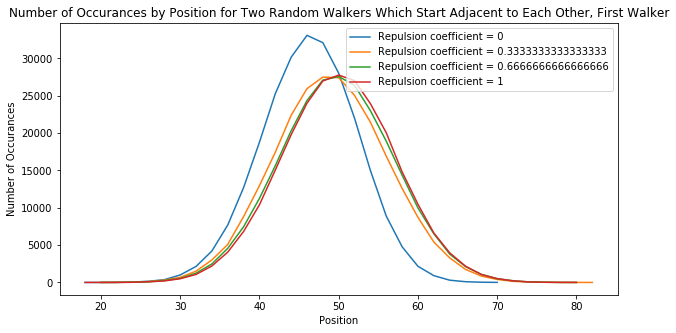

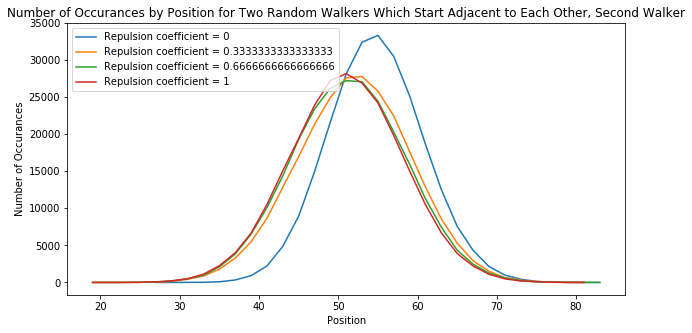

In [0]:
"""
Here are our parameters
"""
numIterations = 250000
gridSize = 100
startPoint1 = int((1/2)*gridSize)
startPoint2 = startPoint1+1
stepsPerIter = int((1/2)*gridSize)

repulStrs = [0, (1/3), (2/3), 1]

"""
This is the data we want to get
"""
walkBoth = []
walk1st = []
walk2nd = []

walk1X = []
walk1Y = []

walk2X = []
walk2Y = []

"""
Here we calculate the data
"""
for entry in repulStrs:
  wAll, w1, w2 = mulSimWalk(numIterations, gridSize, startPoint1, startPoint2, stepsPerIter, entry)
  
  walkBoth.append(wAll)
  walk1st.append(w1)
  walk2nd.append(w2)
  
  w1Dict = lstToDict(w1)
  w2Dict = lstToDict(w2)
  w1K, w1V = dictToLsts(w1Dict)
  w2K, w2V = dictToLsts(w2Dict)
  
  walk1X.append(w1K)
  walk1Y.append(w1V)
  walk2X.append(w2K)
  walk2Y.append(w2V)

"""
Here we prepare the data for ease of presentation
"""
walk1XYs = zip(walk1X, walk1Y, repulStrs)
walk2XYs = zip(walk2X, walk2Y, repulStrs)

"""
Here we plot the data.
"""
plt.figure(figsize=(10,5))
plt.title("Number of Occurances by Position for Two Random Walkers Which Start Adjacent to Each Other, First Walker")
plt.xlabel("Position")
plt.ylabel("Number of Occurances")
for X, Y, repul in walk1XYs:
  plt.plot(X, Y, label = "Repulsion coefficient = {}".format(repul))
plt.legend()
  
plt.figure(figsize=(10,5))
plt.title("Number of Occurances by Position for Two Random Walkers Which Start Adjacent to Each Other, Second Walker")
plt.xlabel("Position")
plt.ylabel("Number of Occurances")
for X, Y, repul in walk2XYs:
  plt.plot(X, Y, label = "Repulsion coefficient = {}".format(repul))
plt.legend()
  
w1StdRepul = zip(w1Stds, repulStrs)
w2StdRepul = zip(w2Stds, repulStrs)

## This is for interacting walkers which start adjacent from each other.

### As we can see from our plots above, if they start together strange things immediately happen. First, as we can see, the stronger their interaction (the lower the repulsion coefficient), the more shifted left or right the Gaussian is overall, depending on if it started on the left or on the right, respectively. The effect is strongest for repulsion coefficient = 0. The non-interacting walkers and the mildly interacting walkers (1 to 0.33) are all roughly of the same size, while the maximally interacting walker (0) appears to have a much smaller width, and a much greater height!

### The reason for the skewing left or right is that since they start adjacent to each other, they start off at an odd separation from each other, and as each step adds or removes 1 from both, they always remain at an odd separation from each other. The cause of this separation where it wasn't apparent above is that above, the separation is always even, whilst here it is always odd.

In [0]:
"""
Here is the data we want to calculate for.
"""
w1Stds = []
w2Stds = []

"""
Here we calculate the data
"""
for entry in walk1st:
  w1Stds.append(np.std(entry))
for entry in walk2nd:
  w2Stds.append(np.std(entry))

"""
Here we prepare the data for ease of use
"""
w1StdRepul = zip(w1Stds, repulStrs)
w2StdRepul = zip(w2Stds, repulStrs)

"""
Here we print the data
"""
print("For each repulsion coefficient, for the first random walker:")
for std, repul in w1StdRepul:
  print("\t The repulsion coefficient was: {}".format(repul))
  print("\t The standard deviation was: {}".format(std))

print()
print("For each repulsion coefficient, for the second random walker:")
for std, repul in w2StdRepul:
  print("\t The repulsion coefficient was: {}".format(repul))
  print("\t The standard deviation was: {}".format(std))

For each repulsion coefficient, for the first random walker:
	 The repulsion coefficient was: 0
	 The standard deviation was: 5.997788244286054
	 The repulsion coefficient was: 0.3333333333333333
	 The standard deviation was: 7.138661219848999
	 The repulsion coefficient was: 0.6666666666666666
	 The standard deviation was: 7.154609511663372
	 The repulsion coefficient was: 1
	 The standard deviation was: 7.068761730991929

For each repulsion coefficient, for the second random walker:
	 The repulsion coefficient was: 0
	 The standard deviation was: 6.00243220795837
	 The repulsion coefficient was: 0.3333333333333333
	 The standard deviation was: 7.135685254901871
	 The repulsion coefficient was: 0.6666666666666666
	 The standard deviation was: 7.146483215474307
	 The repulsion coefficient was: 1
	 The standard deviation was: 7.070417635420414


## This is for walkers which started adjacent!

### As we can see from our results, the adjacent walkers had the same pattern as the walkers that started right beside each other. If they maximally interacted, it has a standard deviation a full integer below if they remotely did not interact.

# 3.3.2 Assignment 5 Problem (30 points): Hitting Times

One important quantity in simulations of networks in computer science and physics is the *hitting time* $h$. This is the average number of steps (i.e. time) needed for a random walker (starting in a random position $r$) to occupy some other (randomly chosen) site $s$ of the network. Quantities of interest include: the characteristics of the distribution of hitting times as a function of the distance between $r$ and $s$, where distance is measured as the minimum number of hops required to get from $s$ to $r$ (or vice versa); and the mean hitting time as a function of the network diameter, where the diameter is the smallest number of hops required to get from any site to any other. For a one-dimensional line, the diameter is simply the number of sites $N$.

**Problem (20 points):** Consider a single random walker on a one-dimensional line with $N$ sites, with periodic boundary conditions (i.e. a circle); please use real randomness, not the Markov chain. For $N=20$, obtain the distribution of hitting times for the case when $r$ and $s$ are as far apart as possible. Obtain the mean hitting time and the standard deviation. 

Obtain the asymptotic behaviour of the distribution function (i.e. for long times).

**Problem (10 points):** Plot the mean hitting time $\overline{h}$ as a function of the separation $|s-r|$ and obtain its scaling. Comment on the results.

In [0]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt

"""
This function calculates how much time it takes for a
random walker at the start point to reach the end point.
Params:
  gridSize: The size of the 1d universe. Periodic
    boundary conditions are assumed.
  startPos: The starting position of the walker
  endPos: The ending position of the walker.
Returns:
  numSteps: The number of steps it takes for the
    walker to reach the ending position.
"""
def getHitTime(gridSize, startPos, endPos):
  start = startPos
  numSteps = 0
  while (start != endPos):
    decrement = rand.random() < 0.5
    #print("--")
    #print(start)
    start = ((start-1) % gridSize) if decrement else ((start+1) % gridSize)
    #print(start)
    numSteps += 1
  return numSteps

"""
This function returns a list of the number of steps needed
for many iterations of finding the hitting time.
Params:
  gridSize: The size of the 1d universe. Periodic
    boundary conditions are assumed.
  startPos: The starting position of the walker
  endPos: The ending position of the walker.
  numIterations: The number of random walk iterations.
Returns:
  results: A list of the number of steps taken per iteration.
  
"""
def getManyHitTimes(gridSize, startPos, endPos, numIterations):
  results = []
  for entry in range(numIterations):
    results.append(getHitTime(gridSize, startPos, endPos))
  return results

"""
This function gets the average amount of steps it takes
for a random walker to hit a given point, averaging over 
some number of input interations.
Params:
  gridSize: The size of the 1d universe. Periodic
    boundary conditions are assumed.
  sep: The separation between the start position and the end position.
  numIter: Number of iterations to test for.
Returns:
  The mean of all the iteration results.
"""
def getMeanHitTime(gridSize, sep, numIter):
  s = 0
  r = s + sep
  results = getManyHitTimes(gridSize, s, r, numIter)
  return np.mean(results)

The Standard Deviation is: 81.3089596807043
The mean hitting time is: 99.83304


Text(0, 0.5, 'Number of Occurances')

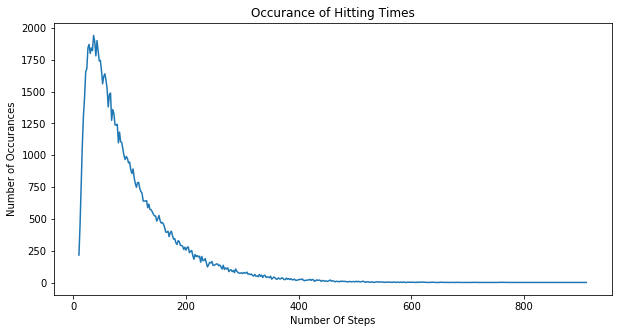

In [7]:
"""
These variables control the size of the grid, the spacing of the walker and its target destination, as well as the number of iterations to check for.
"""
N = 20
s = 0
r = (s + N//2) % N #For periodic boundary conditions, the furthest any one position can be from the other is half the circle away. This translates to its position + half the circle mod circle.
numIter = 100000

"""
Here we do the calculations.
"""
results = getManyHitTimes(N, s, r, numIter)
resultsX, resultsY = dictToLsts(lstToDict(results))
std = np.std(results)
mean = np.mean(results)

"""
Here we show the calculations.
"""
print("The Standard Deviation is: {}".format(std))
print("The mean hitting time is: {}".format(mean))

"""
Here we show the graph.
"""
plt.figure(figsize=(10,5))
plt.plot(resultsX, resultsY)
plt.title("Occurance of Hitting Times")
plt.xlabel("Number Of Steps")
plt.ylabel("Number of Occurances")

### Above we have the hitting time, standard deviation, and distribution, as expected. We can see that this function apppears to grow something like linearly or an extremely massive power law, before decaying extremely rapidly. For the long time asymptotic behavior, we're in the decay region,. which appears to start somewhere past the 100 steps point. This decay appears exponential or power law based. Let's check:

Text(0, 0.5, 'Number of Occurances')

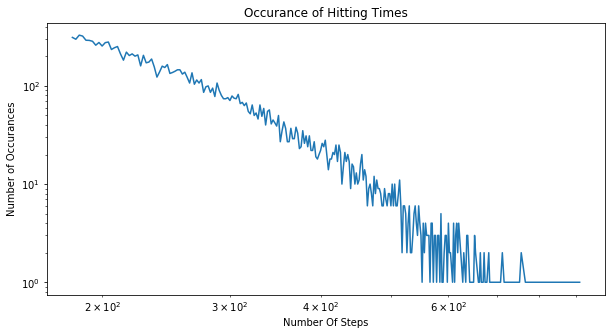

In [8]:
#Check power law

plt.figure(figsize=(10,5))
#plt.plot(np.log10(resultsX), np.log10(resultsY))
plt.loglog(resultsX[len(resultsX)//4:], resultsY[len(resultsY)//4:])
plt.title("Occurance of Hitting Times")
plt.xlabel("Number Of Steps")
plt.ylabel("Number of Occurances")

### This doesn't look quite linear. In fact, this looks relatively curved. It's probably not power law as a result.

Text(0, 0.5, 'Log of Number of Occurances')

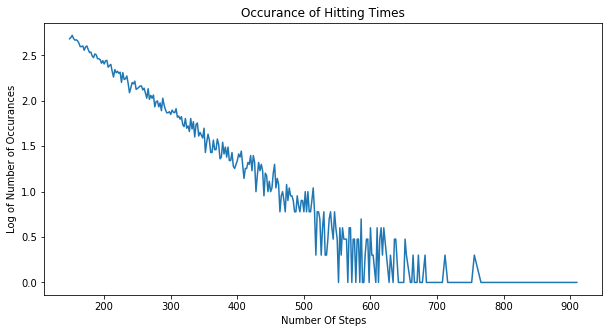

In [9]:
#Checking for exponential

plt.figure(figsize=(10,5))
plt.plot(resultsX[len(resultsY)//5:], np.log10(resultsY[len(resultsY)//5:]))
plt.title("Occurance of Hitting Times")
plt.xlabel("Number Of Steps")
plt.ylabel("Log of Number of Occurances")

### This looks extremely linear, especially after we consider the linear haze. As such, this distribution function almost certainly scales exponentially. Let's find the fit.

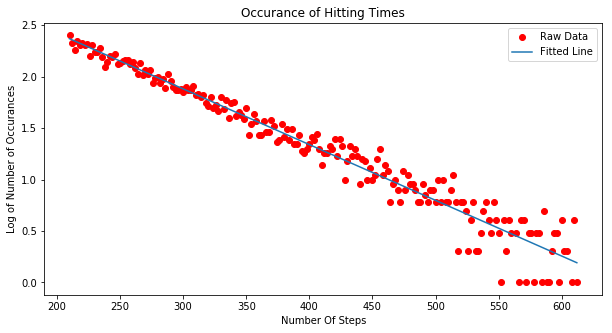

In [10]:
#Do a linear fit to show how it fits
poly = np.polyfit(resultsX[50:300], np.log10(resultsY[50:300]), 1)

plt.figure(figsize=(10,5))
plt.plot(resultsX[100:300], np.log10(resultsY[100:300]), "ro", label = "Raw Data")
plt.plot(resultsX[100:300], ((np.array(resultsX[100:300]) * poly[0]) + poly[1]), label = "Fitted Line")
plt.title("Occurance of Hitting Times")
plt.xlabel("Number Of Steps")
plt.ylabel("Log of Number of Occurances")
plt.legend()

In [0]:
print("The fit coefficients were, for log(a) + bx*log(e):")
print("\t log(a) = {}".format(poly[1]))
print("\t b = {}".format(poly[0]))

The fit coefficients were, for log(a) + bx*log(e):
	 log(a) = 3.5046860048923016
	 b = -0.0054120835373399545


#### As we can see, the linear fit works pretty well, and we have reasonable coefficients. We now have the asymptotic behavior of the function for long times.

#### Now we find the mean hitting times as a function of separation, and then find its scaling.

Text(0, 0.5, 'Mean Hitting Time')

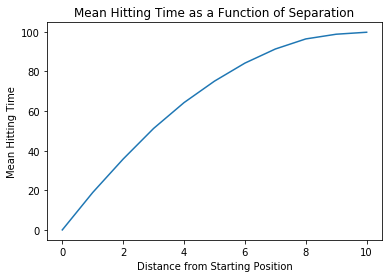

In [0]:
#Our parameters
seps = [x for x in range(0, 11)]
N = 20
numIter = 100000

#Finding the mean times per separation.
meanTimes = []
for entry in seps:
  meanTimes.append(getMeanHitTime(N, entry, numIter))

#Now we plot the data we got.
plt.figure()
plt.plot(seps, meanTimes)
plt.title("Mean Hitting Time as a Function of Separation")
plt.xlabel("Distance from Starting Position")
plt.ylabel("Mean Hitting Time")

### This looks either like the first half of a parabola, square root, or some sort of log decay. However, note the periodic boundary conditions. Let's check all.

Text(0, 0.5, 'Mean Hitting Time')

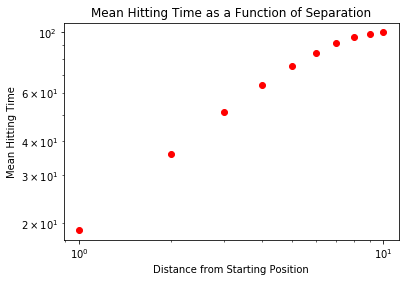

In [0]:
#Check power law.
plt.figure()
plt.loglog(seps, meanTimes, "ro")
plt.title("Mean Hitting Time as a Function of Separation")
plt.xlabel("Distance from Starting Position")
plt.ylabel("Mean Hitting Time")

### This almost looks right, except it's curved towards the end. This encompasses any parabola or square root possibilities. Let's check exponential

Text(0, 0.5, 'Log of Mean Hitting Time')

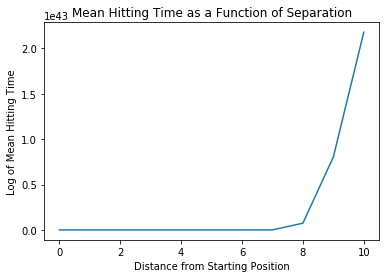

In [0]:
#Check is log decay
plt.figure()
plt.plot(seps, np.exp(meanTimes))
plt.title("Mean Hitting Time as a Function of Separation")
plt.xlabel("Distance from Starting Position")
plt.ylabel("Log of Mean Hitting Time")

### While it's subtle, there is a bit of a curve from 6 to 8 to 9 to 10. This is clearly not the right fit.

### Neither fit particularly well, what's going on?

### The periodic boundary conditions are going to cause us problems, as approaching position 11 is equivalent to approaching position 9, and so on. THAT is why our power law scaling seems to curve off towards the end. In fact...

Text(0, 0.5, 'Mean Hitting Time')

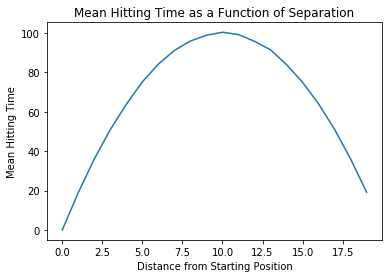

In [0]:
#Our parameters
seps = [x for x in range(0, 20)]
N = 20
numIter = 100000

#Finding the mean times per separation.
meanTimes = []
for entry in seps:
  meanTimes.append(getMeanHitTime(N, entry, numIter))

#Now we plot the data we got.
plt.figure()
plt.plot(seps, meanTimes)
plt.title("Mean Hitting Time as a Function of Separation")
plt.xlabel("Distance from Starting Position")
plt.ylabel("Mean Hitting Time")

Text(0, 0.5, 'Mean Hitting Time')

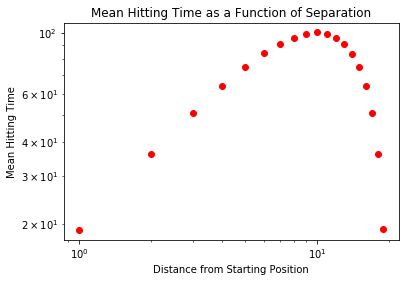

In [0]:
#Check power law.
plt.figure()
plt.loglog(seps, meanTimes, "ro")
plt.title("Mean Hitting Time as a Function of Separation")
plt.xlabel("Distance from Starting Position")
plt.ylabel("Mean Hitting Time")

### As we can see from the graph of the extended form, it now appears to go up linearly, bend, and then go down curved. If we didn't have these periodic boundary conditions, it should just scale linearly. Let's prove that with a massive N.

Text(0, 0.5, 'Mean Hitting Time')

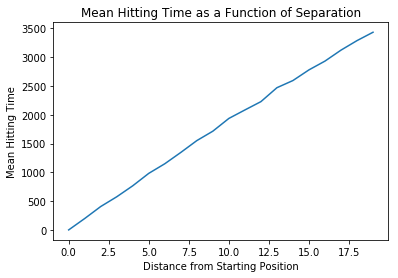

In [0]:
#Our parameters
seps = [x for x in range(0, 20)]
N = 200 #New massive N
numIter = 100000

#Finding the mean times per separation.
meanTimes = []
for entry in seps:
  meanTimes.append(getMeanHitTime(N, entry, numIter))

#Now we plot the data we got.
plt.figure()
plt.plot(seps, meanTimes)
plt.title("Mean Hitting Time as a Function of Separation")
plt.xlabel("Distance from Starting Position")
plt.ylabel("Mean Hitting Time")

Text(0, 0.5, 'Mean Hitting Time')

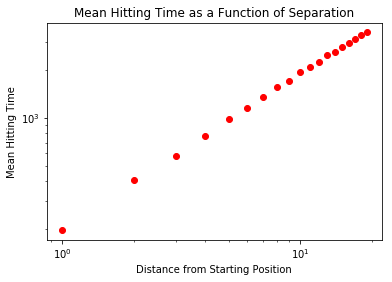

In [0]:
#Check power law.
plt.figure()
plt.loglog(seps, meanTimes, "ro")
plt.title("Mean Hitting Time as a Function of Separation")
plt.xlabel("Distance from Starting Position")
plt.ylabel("Mean Hitting Time")

### This confirms that if it weren't for the periodic boundary conditions, the scaling of the mean hitting times as a function of the distance from the starting position should be a power law distribution - in fact, it should specifically be the linear distribution! Taking these lessions and reexamining our original plots, we can see that our original plots do approximately appear linear for N from 0 to before the turning point, and especially so in the power law graph. As such, a power law fit is the best fit for our graph. Let's find its specifics.


Text(0, 0.5, 'Mean Hitting Time')

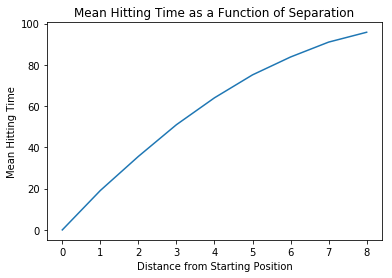

In [0]:
#Our parameters
seps = [x for x in range(0, 9)]
N = 20
numIter = 100000

#Finding the mean times per separation.
meanTimes = []
for entry in seps:
  meanTimes.append(getMeanHitTime(N, entry, numIter))

#Now we plot the data we got.
plt.figure()
plt.plot(seps, meanTimes)
plt.title("Mean Hitting Time as a Function of Separation")
plt.xlabel("Distance from Starting Position")
plt.ylabel("Mean Hitting Time")

Text(0, 0.5, 'Mean Hitting Time')

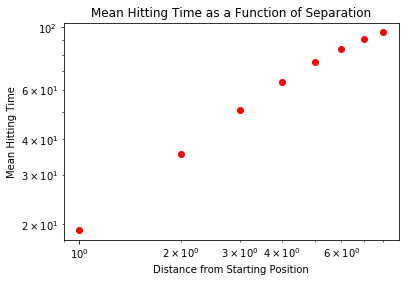

In [0]:
#Check power law.
plt.figure()
plt.loglog(seps, meanTimes, "ro")
plt.title("Mean Hitting Time as a Function of Separation")
plt.xlabel("Distance from Starting Position")
plt.ylabel("Mean Hitting Time")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


Text(0, 0.5, 'Log of Mean Hitting Time')

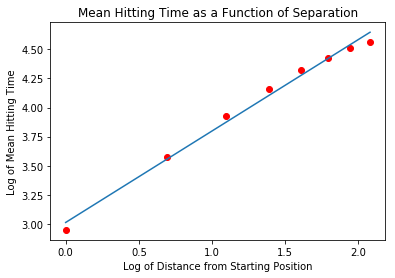

In [0]:
#Finding the fit.
polyDegs = np.polyfit(np.log(seps[1:]), np.log(meanTimes[1:]), 1)

#Compare power law and
plt.figure()
plt.plot(np.log(seps), np.log(meanTimes), "ro")
plt.plot(np.log(seps[1:]), np.log(np.array(seps[1:])) * polyDegs[0] + polyDegs[1])
plt.title("Mean Hitting Time as a Function of Separation")
plt.xlabel("Log of Distance from Starting Position")
plt.ylabel("Log of Mean Hitting Time")

### So as we can see, the fit isn't perfect, but basically if it weren't for the periodic boundary conditions, the fit would be perfectly linear on the loglog graph, indicating that it's a power law situation.